<a href="https://colab.research.google.com/github/yongcito/CBNU_AI/blob/main/Mini_Project_3_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Drive 마운트하기
from google.colab import drive
drive.mount('/content/drive')

# 경로 탐색 및 확인
import os

# Colab Notebooks 폴더의 내용 확인
print(os.listdir('/content/drive/My Drive/Colab Notebooks'))

# img 폴더의 내용 확인
print(os.listdir('/content/drive/My Drive/Colab Notebooks/img'))

# 정확한 경로 설정 및 flow_from_directory 사용
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/My Drive/Colab Notebooks/img'  # 이미지 파일이 저장된 정확한 경로

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'  # 여러 클래스가 있으므로 'categorical' 사용
)


In [ ]:
import os
from PIL import Image
import numpy as np

# 이미지 디렉토리 경로
data_dir = '/content/drive/My Drive/Colab Notebooks/img'

# img 디렉토리 내의 파일 목록 확인
image_files = os.listdir(data_dir)
print("Files in the directory:", image_files)


In [ ]:
import os
from PIL import Image
import numpy as np

# 이미지 디렉토리 경로
data_dir = '/content/drive/My Drive/Colab Notebooks/img'

# 모든 하위 디렉토리와 파일 탐색
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # 각 이미지의 전체 경로
        image_path = os.path.join(root, file)

        try:
            # 이미지 로드
            image = Image.open(image_path)

            # 이미지 픽셀 값을 NumPy 배열로 변환
            image_array = np.array(image)

            # 이미지의 크기 및 픽셀 값 출력
            print(f"Image: {image_path}")
            print("Image shape:", image_array.shape)
            print("Pixel values:")
            print(image_array)
            print("\n")
        except Exception as e:
            print(f"Could not process {image_path}: {e}")


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 디렉토리 경로
data_dir = '/content/drive/My Drive/Colab Notebooks/img'

# 평균 픽셀 값을 저장할 리스트
mean_pixel_values = []

# 모든 하위 디렉토리와 파일 탐색
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # 각 이미지의 전체 경로
        image_path = os.path.join(root, file)

        try:
            # 이미지 로드
            image = Image.open(image_path)

            # 이미지 픽셀 값을 NumPy 배열로 변환
            image_array = np.array(image)

            # 이미지의 평균 픽셀 값 계산
            mean_pixel_value = image_array.mean(axis=(0, 1))
            mean_pixel_values.append(mean_pixel_value)

            print(f"Processed {image_path}")
        except Exception as e:
            print(f"Could not process {image_path}: {e}")

# 평균 픽셀 값을 배열로 변환
mean_pixel_values = np.array(mean_pixel_values)

# 각 채널(R, G, B)의 평균 계산
overall_mean_pixel_value = mean_pixel_values.mean(axis=0)

# 결과 출력
print(f"Overall mean pixel value: {overall_mean_pixel_value}")

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow([overall_mean_pixel_value / 255.0])  # 0-1 범위로 스케일링
plt.title('Average Pixel Value')
plt.axis('off')
plt.show()


Sample image path: /content/drive/My Drive/Colab Notebooks/img/grape/grape19.jpg


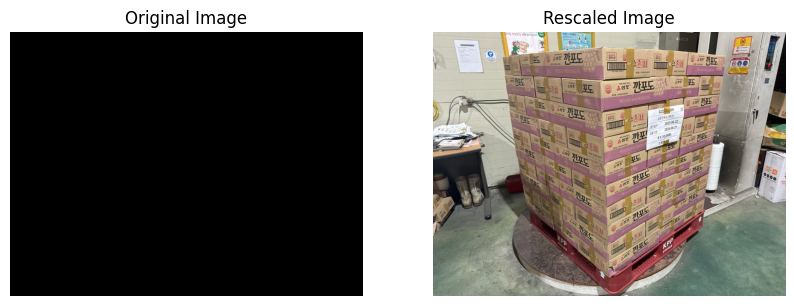

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# ImageDataGenerator 생성
datagen = ImageDataGenerator(rescale=1./255)

# img 디렉토리의 경로
data_dir = '/content/drive/My Drive/Colab Notebooks/img'

# 각 폴더 내의 파일 목록 확인 및 첫 번째 파일 선택
categories = ['grape', 'whelk', 'peach']
sample_image_path = None

for category in categories:
    category_path = os.path.join(data_dir, category)
    image_files = os.listdir(category_path)
    if image_files:
        sample_image_path = os.path.join(category_path, image_files[0])
        break

if sample_image_path is None:
    print("No images found in the subdirectories.")
else:
    print("Sample image path:", sample_image_path)

    # 이미지 로드 및 배열 변환
    original_image = load_img(sample_image_path)
    image_array = img_to_array(original_image)

    # 이미지 전처리
    processed_image_array = datagen.standardize(image_array)

    # 원본 이미지와 전처리된 이미지 시각화
    plt.figure(figsize=(10, 5))

    # 원본 이미지
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array.astype('uint8'))
    plt.axis('off')

    # 전처리된 이미지
    plt.subplot(1, 2, 2)
    plt.title("Rescaled Image")
    plt.imshow(processed_image_array)
    plt.axis('off')

    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 250 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
8/8 [==============================] - 147s 19s/step - loss: 1.5837 - accuracy: 0.3640 - val_loss: 1.1065 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 63s 8s/step - loss: 1.0767 - accuracy: 0.4040 - val_loss: 1.0080 - val_accuracy: 0.3833
Epoch 3/10
8/8 [==============================] - 76s 10s/step - loss: 0.8491 - accuracy: 0.5600 - val_loss: 0.6093 - val_accuracy: 0.8667
Epoch 4/10
8/8 [==============================] - 71s 9s/step - loss: 0.5477 - accuracy: 0.8120 - val_loss: 0.5021 - val_accuracy: 0.8500
Epoch 5/10
8/8 [==============================] - 65s 8s/step - loss: 0.3317 - accuracy: 0.9160 - val_loss: 0.3547 - val_accuracy: 0.8500
Epoch 6/10
8/8 [==============================] - 72s 9s/step - loss: 0.2044 - accuracy: 0.9360 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


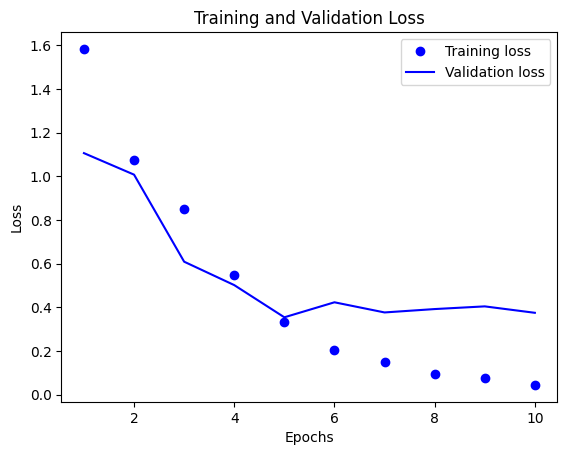

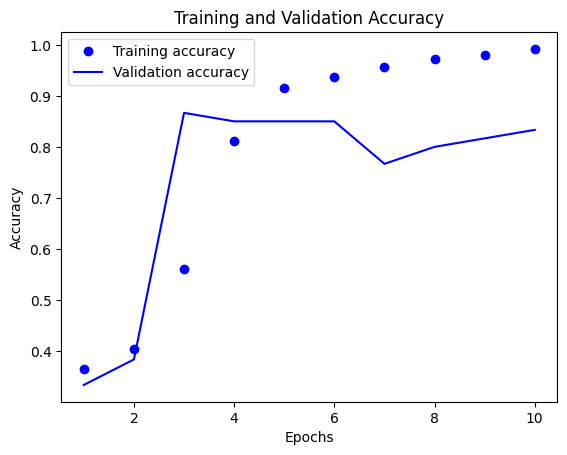

2/2 [==============================] - 14s 6s/step - loss: 0.3752 - accuracy: 0.8333
Test Loss: 0.37524211406707764
Test Accuracy: 0.8333333134651184


In [ ]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

drive.mount('/content/drive')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

data_dir = '/content/drive/My Drive/Colab Notebooks/img'


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=seed
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=seed
)


model = tf.keras.Sequential([
    # CNN 입력층
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # CNN 중간층
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    # CNN 출력층
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


model.save('/content/drive/My Drive/Colab Notebooks/your_model.h5')

# 학습 결과 시각화
loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
val_loss_values = history.history['val_loss']
val_accuracy_values = history.history['val_accuracy']
epochs = range(1, len(loss_values) + 1)

# 손실 그래프
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 평가
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


1/1 [==============================] - 0s 28ms/step
Image: 429747B7-6A25-46BB-875A-513394EB3601.jpg, Predicted class: peach


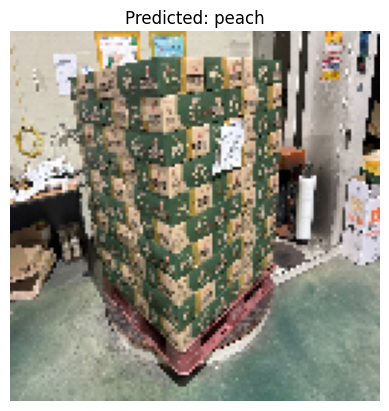

1/1 [==============================] - 0s 27ms/step
Image: 8F5C98D4-D288-4489-902F-47627930F93E.jpg, Predicted class: peach


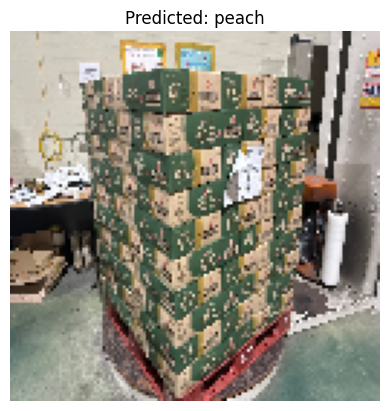

1/1 [==============================] - 0s 42ms/step
Image: 6E47097A-1DFC-41F8-A4D8-D4274B15FD06.jpg, Predicted class: peach


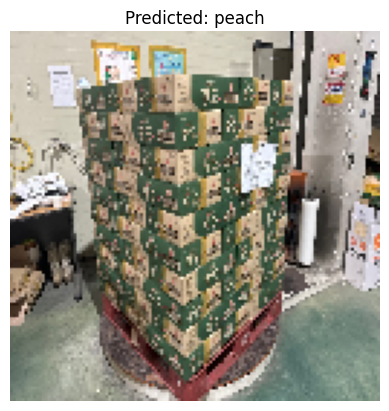

1/1 [==============================] - 0s 29ms/step
Image: 9CB3C6BC-CC35-460E-A86E-55E6B2665C63.jpg, Predicted class: peach


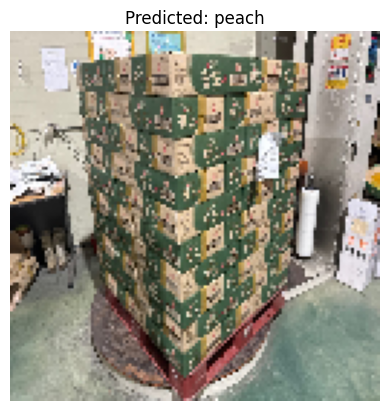

1/1 [==============================] - 0s 28ms/step
Image: B31971AF-EDFE-443A-B8A6-B3C55EB43CA5.jpg, Predicted class: peach


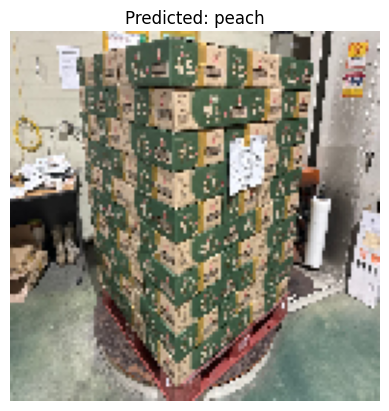

1/1 [==============================] - 0s 28ms/step
Image: D1E0539A-C0F5-43C0-8033-426D4C50D5E0.jpg, Predicted class: peach


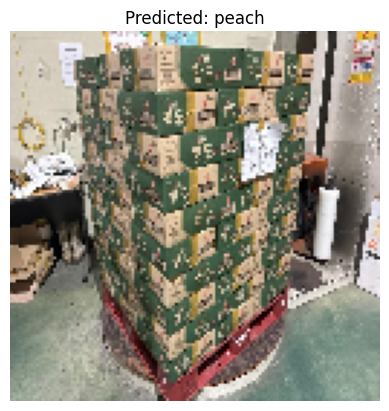

1/1 [==============================] - 0s 30ms/step
Image: BB415631-C81A-404C-BA7D-807B0AA3638E.jpg, Predicted class: peach


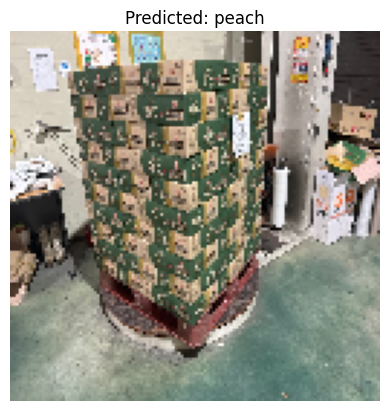

1/1 [==============================] - 0s 38ms/step
Image: 860313D6-F703-4849-A996-0964D25FC314.jpg, Predicted class: whelk


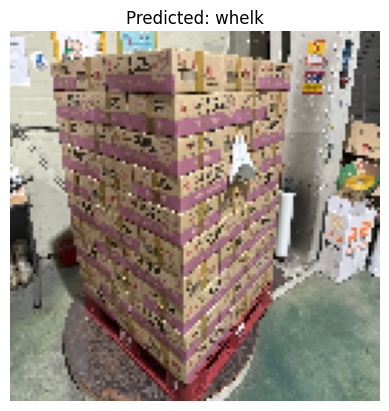

1/1 [==============================] - 0s 29ms/step
Image: B15918BC-FDD4-456B-81D2-4418D22F6BC5.jpg, Predicted class: grape


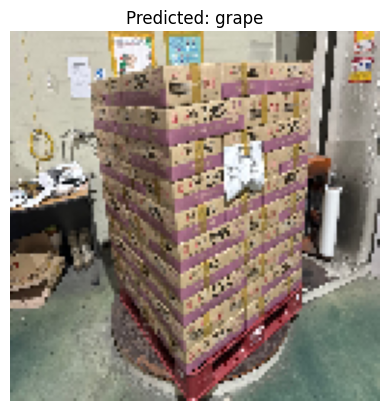

In [ ]:
import os

# 새로운 이미지가 저장된 디렉토리 경로
new_images_dir = '/content/drive/My Drive/Colab Notebooks/new_images'

# 클래스 레이블
class_labels = list(train_generator.class_indices.keys())

# 새로운 이미지를 예측하고 시각화하는 함수
def predict_and_plot_new_images(model, new_images_dir, class_labels):
    for filename in os.listdir(new_images_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(new_images_dir, filename)

            # 이미지 로드 및 전처리
            img = image.load_img(image_path, target_size=(128, 128))  # 모델 입력 크기에 맞게 이미지 크기 조정
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # 이미지 스케일링

            # 모델 예측
            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions, axis=1)

            # 예측 결과 출력 및 시각화
            print(f'Image: {filename}, Predicted class: {class_labels[predicted_class[0]]}')
            plt.imshow(img)
            plt.title(f'Predicted: {class_labels[predicted_class[0]]}')
            plt.axis('off')
            plt.show()

# 새로운 이미지 예측 및 시각화
predict_and_plot_new_images(model, new_images_dir, class_labels)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 새로운 이미지가 저장된 디렉토리 경로
new_images_dir = '/content/drive/My Drive/Colab Notebooks/new_images'

# 클래스 레이블
class_labels = list(train_generator.class_indices.keys())

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# 새로운 이미지를 예측하고 시각화하는 함수
def predict_and_plot_new_images(model, new_images_dir, class_labels):
    for filename in filter(lambda f: f.endswith(('.jpg', '.jpeg', '.png')), os.listdir(new_images_dir)):
        image_path = os.path.join(new_images_dir, filename)
        img_array = load_and_preprocess_image(image_path)

        predictions = model.predict(img_array)
        predicted_class = class_labels[np.argmax(predictions, axis=1)[0]]

        print(f'Image: {filename}, Predicted class: {predicted_class}')
        plt.imshow(image.load_img(image_path))
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')
        plt.show()

# 새로운 이미지 예측 및 시각화
predict_and_plot_new_images(model, new_images_dir, class_labels)


NameError: name 'train_generator' is not defined